# Get the Data

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filename):
    read_csv = pd.read_csv(os.path.join("dataset", filename))
    return read_csv

In [80]:
advertising = load_data("Advertising.csv")
advertising.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [81]:
# seems we have unnamed column that acts as the index. We won't be needing this:

advertising = advertising.drop("Unnamed: 0", axis=1)
advertising.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [82]:
# now let's get a quick discription of the data

advertising.info()

# There are 200 instances. All features of the dataset are of the float64 dtype. We don't have a categorical attribute here. The dataset seems pretty okay
# to move forward with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [83]:
# let's get a summary of the dataset

advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Split the Dataset

Choose features (X) and target variables (y)

In [84]:
X = advertising[["TV", "radio", "newspaper"]]
y = advertising[["sales"]]

using Scikit-Learn, we'll split our dataset in training and test sets

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Discover and Visualize the Data to Gain Insight

## Visualizing Features (X)

Let's create a pair plot to visualize pairwise relationships between features:

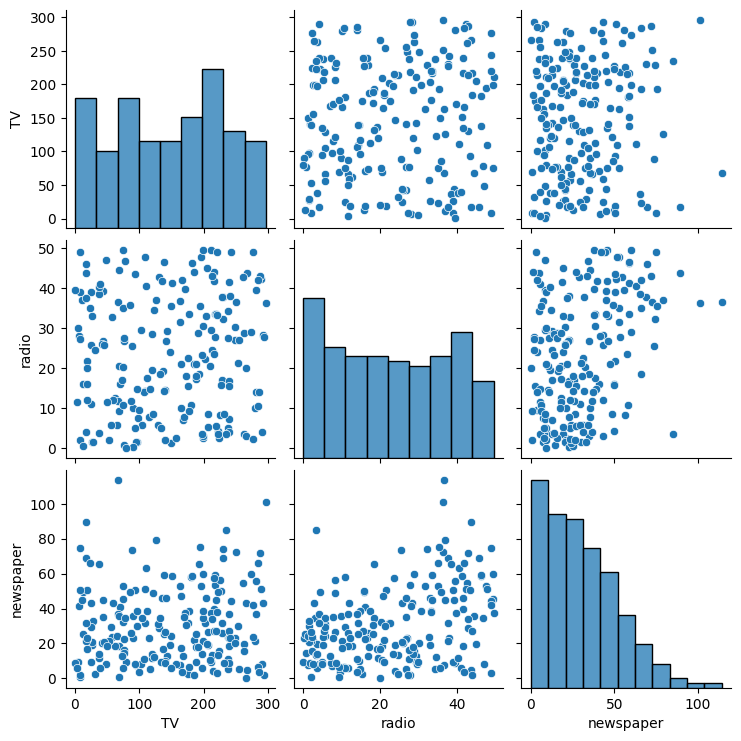

In [86]:
import seaborn as sb

sb.pairplot(X)
plt.show()

Create histograms or kernel density plots to visualize the distribution of individual features:

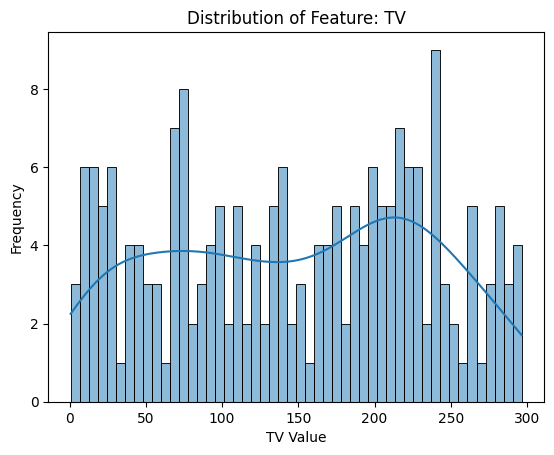

In [87]:
sb.histplot(X["TV"], bins=50, kde=True)
plt.xlabel("TV Value")
plt.ylabel("Frequency")
plt.title("Distribution of Feature: TV")
plt.show()

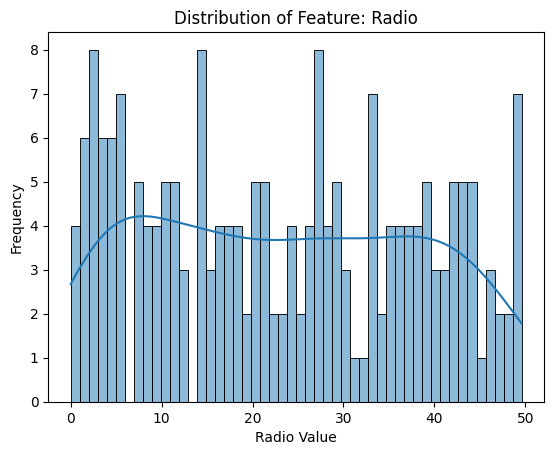

In [88]:
sb.histplot(X["radio"], bins=50, kde=True)
plt.xlabel("Radio Value")
plt.ylabel("Frequency")
plt.title("Distribution of Feature: Radio")
plt.show()

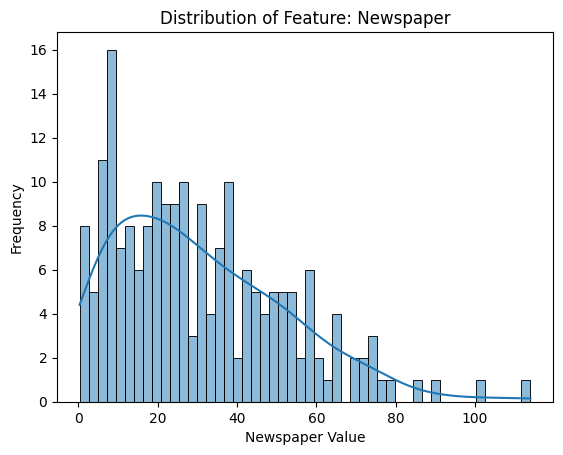

In [89]:
sb.histplot(X["newspaper"], bins=50, kde=True)
plt.xlabel("Newspaper Value")
plt.ylabel("Frequency")
plt.title("Distribution of Feature: Newspaper")
plt.show()

## Visualizing Target Variable (y)

Distribution of the target variable:

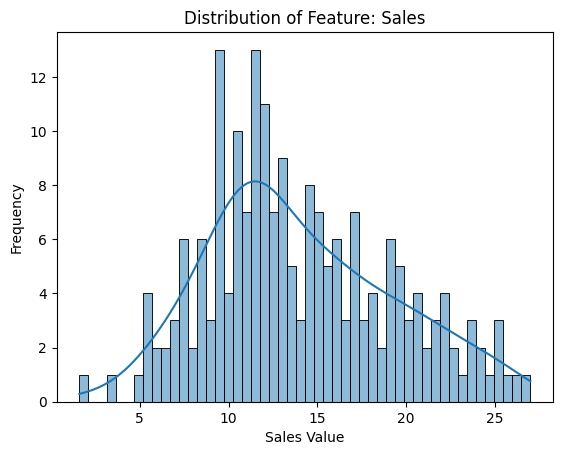

In [90]:
sb.histplot(y["sales"], bins=50, kde=True)
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.title("Distribution of Feature: Sales")
plt.show()

Visualizing the spread and central tendency of the target variable using a box plot or violin plot:

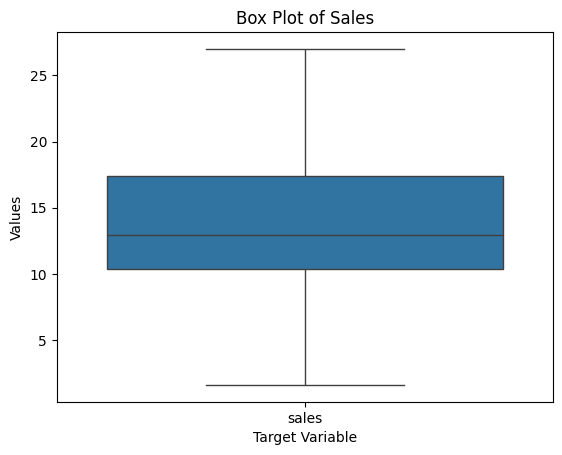

In [91]:
sb.boxplot(y)
plt.xlabel('Target Variable')
plt.ylabel('Values')
plt.title('Box Plot of Sales')
plt.show()

## Looking for Correlations

Compute the correlation coefficient (Pearson's r) and look at how much each attribute correlates with the sales:

In [92]:
corr_matrix = advertising.corr()
corr_matrix["sales"].sort_values(ascending=False)


# It does appear that altering the TV budget will have more effect than the other features

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

Visualize correlation between the TV budget and sales

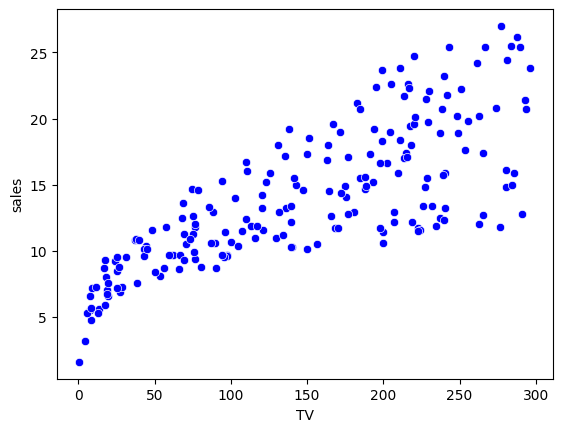

In [121]:
sb.scatterplot(x="TV", y="sales", data=advertising, color="blue")
plt.show()


# noticeable upward trend; points are not too dispersed.

# Prepare Data for ML Algorithms

## Custom Transformer

Create a feature representing an interaction between TV and radio budgets.

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["TV_radio_interaction"] = X["TV"] * X["radio"]
        return X

## Transformation Pipeline

Add custom transformer to pipeline

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create pipeline for preprocessing
pipeline = Pipeline([
    ("feature_engg", CustomFeatureEngineering()),
    ("std_scaler", StandardScaler())
])

# apply preprocessing to the training and test data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Select and Train Model

## Training and Evaluation

### Train a Linear Regression model

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

# make predictions on the test set
y_pred = lin_reg.predict(X_test_transformed)

# evaluate the model
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {lin_rmse}")
print(f"R-squared: {lin_r2}")

Root Mean Squared Error: 0.9024580782957288
R-squared: 0.9741971529119298


#### Additional evaluation using K-fold cross-validation feature

In [117]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(
    lin_reg, X_train_transformed, y_train,
    scoring="neg_mean_squared_error", cv=10
)

lin_rmse_scores = np.sqrt(-lin_scores)

# display scores
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

display_scores(lin_rmse_scores)

Scores: [1.0446666  0.84465829 0.45326694 0.93173739 0.62411872 1.24409272
 0.74869161 0.86056984 1.84504277 0.75177796]
Mean: 0.934862283081381
Standard Deviation: 0.3669400350714372


#### Visualize the predictions vs actual values

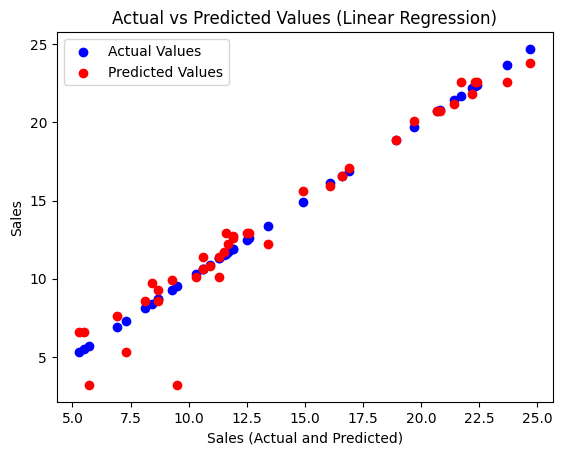

In [124]:
plt.scatter(y_test, y_test, color="blue", label="Actual Values")
plt.scatter(y_test, y_pred, color="red", label="Predicted Values")
plt.xlabel("Sales (Actual and Predicted)")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.legend()
plt.show()

- Model works. Looks impressive.
- R-squared is close to 1. Appears model is providing a good fit to the data, and a high percentage of the variability in the target variable is captured.
- We'll try other models, compare and pick the most impressive.

### Train a Decision Tree Model

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

# train model on transformed training data
tree_reg.fit(X_train_transformed, y_train)

# predict using the trained model on transformed test data
y_pred = tree_reg.predict(X_test_transformed)

# evaluate the model
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, y_pred)

# print RMSE and R-squared values
print(f"RMSE: {tree_rmse}")
print(f"R-squared: {tree_r2}")

RMSE: 1.2926716520447101
R-squared: 0.9470592603226621


#### Additional evaluation using K-fold cross-validation feature

In [123]:
tree_scores = cross_val_score(
    tree_reg, X_train_transformed, y_train,
    scoring="neg_mean_squared_error", cv=10
)

tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [0.79765281 2.01804361 0.6264982  0.51234754 0.73357004 0.6451744
 0.8        0.83815273 0.74665923 0.4168333 ]
Mean: 0.813493184580631
Standard Deviation: 0.4212081891901718


#### Visualize the predictions vs actual values

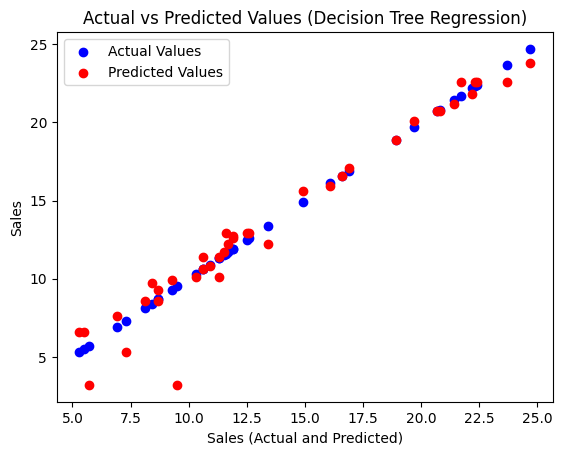

In [125]:
plt.scatter(y_test, y_test, color="blue", label="Actual Values")
plt.scatter(y_test, y_pred, color="red", label="Predicted Values")
plt.xlabel("Sales (Actual and Predicted)")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Values (Decision Tree Regression)")
plt.legend()
plt.show()

- Model looks good too 🤔
- Higher RMSE value than the Linear Regression model
- Lower R-squared value than the Linear Regression model

Analysis: Model performs worse than the Linear Regression model

### Train a Random Forest Model

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

# ensure that y_train is a 1D array using ravel()
y_train = np.ravel(y_train)

# train model on transformed training data
forest_reg.fit(X_train_transformed, y_train)

# predict using the trained model on transformed test data
y_pred = forest_reg.predict(X_test_transformed)

# evaluate the model
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, y_pred)

# print RMSE and R-squared values
print(f"RMSE: {forest_rmse}")
print(f"R-squared: {forest_r2}")

RMSE: 0.52117499460354
R-squared: 0.9913944091046349


#### Additional evaluation using K-fold cross-validation feature

In [130]:
forest_scores = cross_val_score(
    forest_reg, X_train_transformed, y_train,
    scoring="neg_mean_squared_error", cv=10
)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.63981516 0.59282154 0.58957273 0.47942133 0.54503962 0.35534921
 0.38063631 0.65652299 0.81424766 0.35779411]
Mean: 0.5411220654632724
Standard Deviation: 0.14155362594706353


#### Visualize the predictions vs actual values

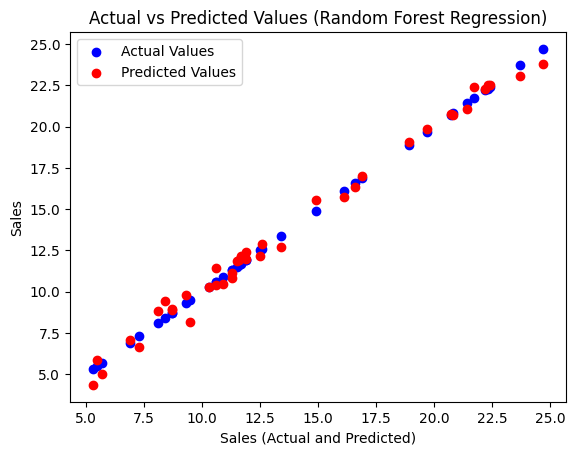

In [131]:
plt.scatter(y_test, y_test, color="blue", label="Actual Values")
plt.scatter(y_test, y_pred, color="red", label="Predicted Values")
plt.xlabel("Sales (Actual and Predicted)")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Values (Random Forest Regression)")
plt.legend()
plt.show()

- Model looks very good 🤔
- Lower RMSE value than the previous models
- Higher R-squared value than the previous models
- RMSE value close to RMSE value on validation set 🤔

Analysis: Model performs much better than the previous two. Doesn't seem to reek of overfitting

# Fine-Tune the Model

## Grid Search

In [135]:
from sklearn.model_selection import GridSearchCV

# define hyperparameters to tune
param_grid = [
    # grid for first set of hyperparameters
    {
        "n_estimators": [3, 10, 30],
        "max_features": [2, 4, 6, 8]
    },

    # grid for second set of hyperparameters
    {
        "bootstrap": [False],
        "n_estimators": [3, 10],
        "max_features": [2, 3, 4]
    }
]

# perform grid search with cross-validation
grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5,  # using 5-fold cross-validation
    scoring="neg_mean_squared_error",  # using negative mean squared error as the scoring metric
    return_train_score=True  # returning training scores for analysis
)

grid_search.fit(X_train_transformed, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# apply the best model to the test data
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test_transformed)

# evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_pred)

# print RMSE and R-squared values
print(f"RMSE: {final_rmse}")
print(f"R-squared: {final_r2}")
print(f"Best Hyperparameter: {best_params}")

RMSE: 0.5134721132750164
R-squared: 0.9916469077254199
Best Hyperparameter: {'max_features': 8, 'n_estimators': 30}


#### Visualize the predictions vs actual values

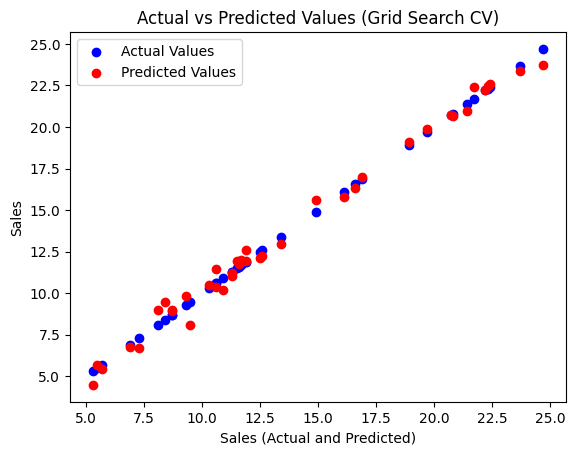

In [136]:
plt.scatter(y_test, y_test, color="blue", label="Actual Values")
plt.scatter(y_test, y_pred, color="red", label="Predicted Values")
plt.xlabel("Sales (Actual and Predicted)")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Values (Grid Search CV)")
plt.legend()
plt.show()